1.What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
- Anomaly Detection in Machine Learning  is the process of identifying data points that deviate significantly from the majority of the data. These unusual patterns are called anomalies or outliers.
It’s widely used in:
- Fraud detection (credit card transactions)
- Healthcare (detecting abnormal patient vitals)
Types of Anomalies in ML
- 1. Point Anomalies
    -  A single data instance is anomalous compared to the rest of the dataset.

- 2. Contextual Anomalies
    -  A data point is anomalous only in a specific context. The same value may be normal in one situation but abnormal in another.

 - 3. Collective Anomalies
    - A group of related data points is anomalous, even if individual points are not.




2.Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

- Isolation Forest
Isolation Forest works on the principle that anomalies are easier to isolate than normal points. It builds random decision trees, and points that require fewer splits to separate are considered anomalies. This method is particularly effective for large, high-dimensional datasets because it scales well and doesn’t rely on distance or density measures.

- DBSCAN
DBSCAN is a clustering algorithm that groups points based on density. Points that don’t belong to any dense cluster are labeled as noise, which makes them potential anomalies. It’s especially useful for spatial data or datasets where clusters have irregular shapes.
- Local Outlier Factor (LOF)
LOF takes a different approach by comparing the local density of a point to that of its neighbors. If a point has a significantly lower density than its surrounding points, it’s flagged as an anomaly. This makes LOF well-suited for datasets where anomalies are relative to local context rather than global distribution.


3.What are the key components of a Time Series? Explain each with one
example
- A time series is a sequence of data points collected or recorded at successive points in time

 Key Components of a Time Series
1. Trend
- Definition: The long-term movement or direction in the data over time. It shows whether the series is increasing, decreasing, or stable.

2. Seasonality
- Definition: Regular, repeating patterns in the data that occur at fixed intervals (daily, monthly, yearly).

3. Cyclic Component
- Definition: Long-term oscillations in the data that are not fixed like seasonality but occur due to economic or business cycles. These cycles usually span several years.

4. Irregular/Random Component
- Definition: Unpredictable variations caused by unexpected events, noise, or one-off occurrences.


4.Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
- A stationary time series is one whose statistical properties do not change over time.
   - Mean is constant (doesn’t trend upward or downward).
   - Variance is constant (no increasing spread over time).
- If a series is non-stationary, we apply transformations to stabilize it:
  - Differencing
    - Subtract the current value from the previous value.
  - Seasonal Adjustment
    - Remove repeating seasonal patterns.
  - Transformation (Variance Stabilization)
    - Apply log, square root, or Box-Cox transformation to stabilize variance.



5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
- Autoregressive (AR) Model
The AR model assumes that the current value of a time series depends on its own past values. In other words, it uses lagged observations as predictors.

- Moving Average (MA) Model
The MA model, instead of relying on past values, uses past forecast errors to predict the current value.

- ARIMA (Autoregressive Integrated Moving Average)
ARIMA combines both AR and MA components, and adds integration, which means differencing the series to make it stationary.
- SARIMA (Seasonal ARIMA)
SARIMA extends ARIMA by explicitly modeling seasonality. It adds seasonal AR, seasonal MA, and seasonal differencing terms.
SARIMAX (Seasonal ARIMA with Exogenous Variables)
- SARIMAX goes one step further by allowing external (exogenous) variables to be included in the model. These are predictors outside the time series itself.

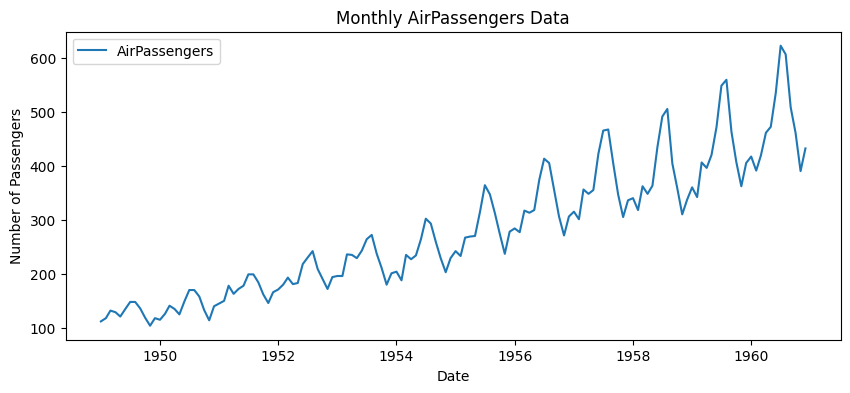

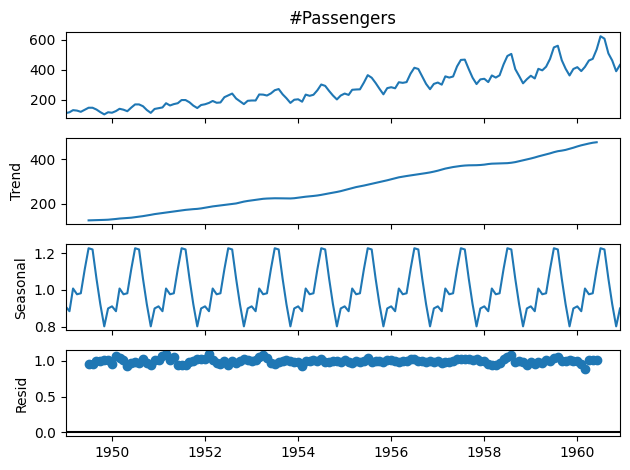

In [14]:
'''
6.Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
data = pd.read_csv("AirPassengers.csv")

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Step 4: Plot the original series
plt.figure(figsize=(10, 4))
plt.plot(data['#Passengers'], label='AirPassengers')
plt.title('Monthly AirPassengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Step 5: Decompose the series
decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative')

# Step 6: Plot decomposition
decomposition.plot()
plt.show()

/tmp/ipython-input-521701845.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['anomaly'] = labels


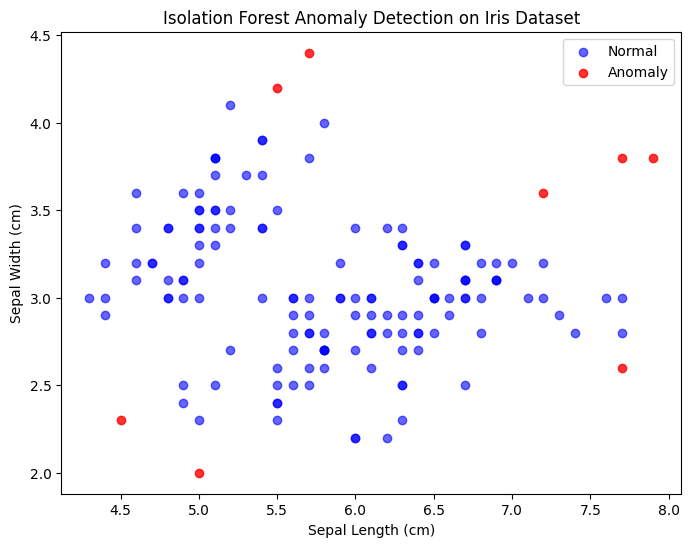

In [15]:
'''
7.Apply Isolation Forest on a numerical dataset to
detect anomalies. Visualize the anomalies on a 2D scatter plot
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

X_subset = X[['sepal length (cm)', 'sepal width (cm)']]

iso = IsolationForest(contamination=0.05, random_state=42)  # 5% anomalies
iso.fit(X_subset)
labels = iso.predict(X_subset)

X_subset['anomaly'] = labels

plt.figure(figsize=(8,6))

plt.scatter(X_subset['sepal length (cm)'][X_subset['anomaly']==1],
            X_subset['sepal width (cm)'][X_subset['anomaly']==1],
            c='blue', label='Normal', alpha=0.6)

plt.scatter(X_subset['sepal length (cm)'][X_subset['anomaly']==-1],
            X_subset['sepal width (cm)'][X_subset['anomaly']==-1],
            c='red', label='Anomaly', alpha=0.8)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Isolation Forest Anomaly Detection on Iris Dataset")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


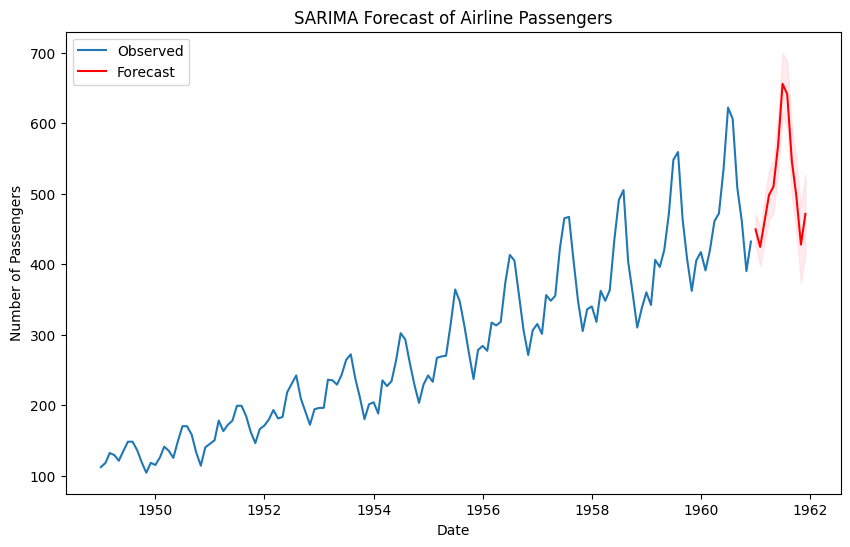

In [17]:

'''
8.Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv("AirPassengers.csv")

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

y = data['#Passengers']
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
pred_ci = forecast.conf_int()

plt.figure(figsize=(10,6))
plt.plot(y, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1], color='pink', alpha=0.3)

plt.title("SARIMA Forecast of Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

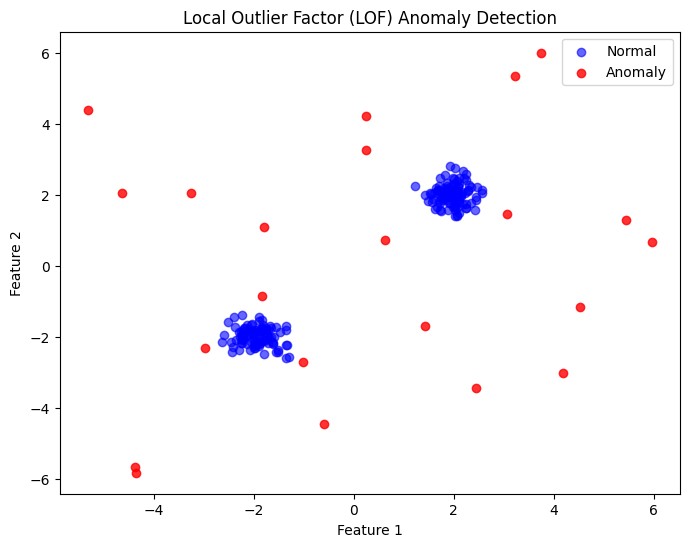

In [18]:
'''
9.Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2) + np.array([2, 2])   # cluster 1
X_inliers2 = 0.3 * np.random.randn(100, 2) + np.array([-2, -2]) # cluster 2
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))    # anomalies

X = np.vstack((X_inliers, X_inliers2, X_outliers))

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)   # -1 = anomaly, 1 = normal


plt.figure(figsize=(8,6))

plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
            c='blue', label='Normal', alpha=0.6)

plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1],
            c='red', label='Anomaly', alpha=0.8)

plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

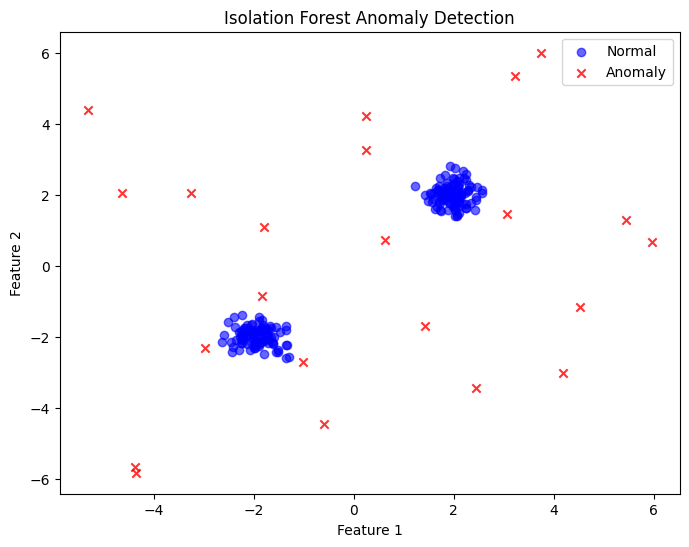

In [21]:
'''
10.You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest+

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2) + np.array([2, 2])


X_inliers2 = 0.3 * np.random.randn(100, 2) + np.array([-2, -2])


X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))


X = np.vstack((X_inliers, X_inliers2, X_outliers))

iso = IsolationForest(contamination=0.1, random_state=42)
y_pred = iso.fit_predict(X)   # -1 = anomaly, 1 = normal


plt.figure(figsize=(8,6))


plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
            c='blue', label='Normal', alpha=0.6)


plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1],
            c='red', label='Anomaly', marker='x', alpha=0.8)

plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
